In [75]:
import pandas as pd
import numpy as np
import seaborn as sns

In [76]:
df =  pd.read_csv('female_comprehensive_final_3Nov.csv')
df['topic_x'] = df['topic'].apply(lambda x: 'T'+str(x))
dm =  pd.read_csv('male_comprehensive_final_3Nov.csv')
dm['topic_x'] = dm['topic'].apply(lambda x: 'T'+str(x))

In [77]:
extractf = df[['year_x','processed_tokens','decade','topic_x']]
extractf['decade'] = extractf['year_x'].apply(lambda x : str(x)[2]+'0s')
extractf['decade'].isna().sum()
extractf

/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_75555/1582958187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extractf['decade'] = extractf['year_x'].apply(lambda x : str(x)[2]+'0s')


,year_x,processed_tokens,decade,topic_x
0,1959,"['hook', 'love', 'porgy', 'let', 'take', 'let'...",50s,T4
1,1959,"['lonely', 'one', 'love', 'lonely', 'soul', 's...",50s,T3
2,1960,"['ueber', 'rio', 'und', 'shanghai', 'ueber', '...",60s,T3
3,1960,"['made', 'night', 'little', 'brighter', 'where...",60s,T1
4,1960,"['shark', 'pretty', 'teeth', 'dear', 'show', '...",60s,T1
...,...,...,...,...
2170,2022,"['chaotic', 'paralyzing', 'fear', 'maybe', 'no...",20s,T3
2171,2022,"['treat', 'know', 'broke', 'tryna', 'handle', ...",20s,T2
2172,2022,"['dfmu', 'like', 'glimpse', 'past', 'conceal',...",20s,T4
2173,2022,"['snap', '4am', 'turn', 'head', 'wishing', 'me...",20s,T3


In [78]:
extractf['topic_x'].value_counts()
topic_options = extractf['topic_x'].unique()
topic_options = sorted(topic_options)
topic_options

['T1', 'T2', 'T3', 'T4']

In [79]:
decadal_groups = extractf.groupby(by=['decade']).agg('topic_x')
print(decadal_groups)

In [80]:
decade_topic = extractf.groupby(by='decade')[['decade','topic_x']]
decade_topic

In [81]:
decades = extractf['decade'].unique()
decades

array(['50s', '60s', '70s', '80s', '90s', '00s', '10s', '20s'],
      dtype=object)

In [86]:
decade_df = decade_topic.get_group('00s')
decades_final = decade_df.pivot_table(index="topic_x", columns="decade", values="topic_x", aggfunc=np.count_nonzero)
decade_df.head()
decades_final.loc['T1']

decade
00s    72
Name: T1, dtype: int64

In [92]:
topic_counts =[[],[],[],[]]
for i in range(len(topic_options)):
    print(topic_options[i], topic_counts[i])
for decade in decades:
    # print(decade)
    decade_df = decade_topic.get_group(decade)
    # print(decade_df)
    decades_final = decade_df.pivot_table(index="topic_x", columns="decade", values="topic_x", aggfunc=np.count_nonzero)
    for i in range(len(topic_options)):
        try:
            topic_counts[i].append(int(decades_final.loc[topic_options[i]])) 
        except:
            topic_counts[i].append(0) 
for i in range(len(topic_options)):
    print(topic_options[i], topic_counts[i])

T1 []
T2 []
T3 []
T4 []
T1 [0, 50, 80, 46, 30, 72, 138, 48]
T2 [0, 24, 16, 30, 62, 272, 310, 142]
T3 [2, 122, 166, 232, 258, 474, 566, 234]
T4 [2, 62, 98, 136, 154, 172, 290, 62]


In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

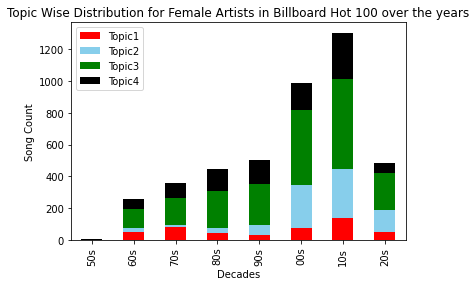

In [95]:
df = pd.DataFrame({'Topic1': topic_counts[0],
                   'Topic2': topic_counts[1],
                   'Topic3': topic_counts[2],
                   'Topic4': topic_counts[3]},
                  index=decades)
                  # create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green','black'])
 
# labels for x & y axis
plt.xlabel('Decades')
plt.ylabel('Song Count')
 
# title of plot
plt.title('Topic Wise Distribution for Female Artists in Billboard Hot 100 over the years')

plt.savefig('female-topics-decades.png', dpi=300)

/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_75555/1514977819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perct['Topic1'] = df['Topic1']*100/df['total']
/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_75555/1514977819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perct['Topic2'] = df['Topic2']*100/df['total']
/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_75555/1514977819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

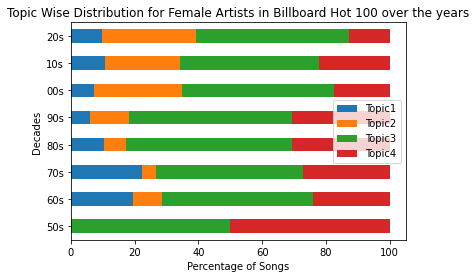

In [97]:
df['total'] =  df['Topic1'] + df['Topic2'] + df['Topic3'] + df['Topic4']
df_perct = df[['Topic1','Topic2','Topic3', 'Topic4']]
df_perct['Topic1'] = df['Topic1']*100/df['total']
df_perct['Topic2'] = df['Topic2']*100/df['total']
df_perct['Topic3'] = df['Topic3']*100/df['total']
df_perct['Topic4'] = 100 - df_perct['Topic1'] - df_perct['Topic2'] - df_perct['Topic3']
df_perct.plot(
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)
df_perct

# labels for x & y axis
plt.ylabel('Decades')
plt.xlabel('Percentage of Songs')
 
# title of plot
plt.title('Topic Wise Distribution for Female Artists in Billboard Hot 100 over the years')

plt.savefig('female-topics-decades-perct.png', dpi=300)

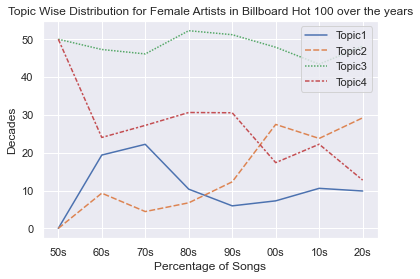

In [98]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_perct)
# labels for x & y axis
# labels for x & y axis
plt.ylabel('Decades')
plt.xlabel('Percentage of Songs')
 
# title of plot
plt.title('Topic Wise Distribution for Female Artists in Billboard Hot 100 over the years')

plt.savefig('female-topics-decades-perct-line.png', dpi=300)